In [28]:
import numpy as np
import scipy.integrate as integrate
from math import pi as PI
import matplotlib.pyplot as plt

In [29]:
def f(x):
    return 4/(1 + x*x)

In [30]:
def integrate_rectangle(f, start, end, no_points):
    i = start
    output = 0.0;
    interval = (end - start)/ no_points
    while i < end:
        output += interval*f(i) if i + interval < end else (end-i)*f(i)
        i += interval
    return output

m = 1 M : 3.4564102564102566 , T :  3.1 , S :  3.1333333333333333
m = 2 M : 3.3349261138109902 , T :  3.131176470588236 , S :  3.1415686274509804
m = 3 M : 3.2506461552653927 , T :  3.1389884944910893 , S :  3.1415925024587064
m = 4 M : 3.1998394818150153 , T :  3.140941612041389 , S :  3.141592651224822
m = 5 M : 3.1717426382867715 , T :  3.1414298931749745 , S :  3.141592653552836
m = 6 M : 3.1569378212426837 , T :  3.1415519634856555 , S :  3.141592653589216
m = 7 M : 3.1493345761505322 , T :  3.141582481063752 , S :  3.1415926535897842
m = 8 M : 3.145481180794354 , T :  3.141590110458283 , S :  3.141592653589793
m = 9 M : 3.143541338021944 , T :  3.1415920178069157 , S :  3.141592653589793
m = 10 M : 3.142568104710154 , T :  3.141592494644074 , S :  3.141592653589793
m = 11 M : 3.1420806568400454 , T :  3.1415926138533634 , S :  3.141592653589793
m = 12 M : 3.1418367246954415 , T :  3.1415926436556862 , S :  3.141592653589793
m = 13 M : 3.1417147065200184 , T :  3.141592651106266 ,

<function matplotlib.pyplot.show(close=None, block=None)>

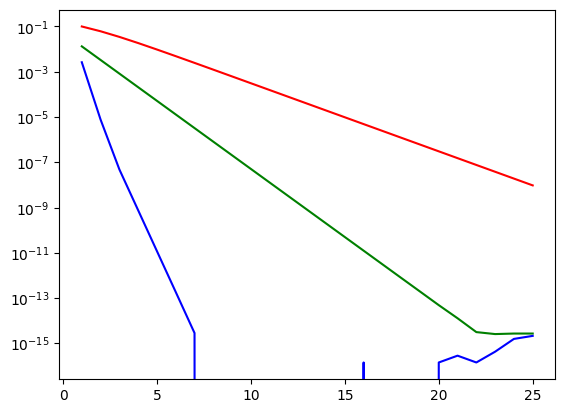

In [31]:
y_M = np.zeros(26)
y_T = np.zeros(26)
y_S = np.zeros(26)
err_M = []
err_T = []
err_S = []
for m in range(1, 26):
    x_space = np.linspace(0, 1, 2**m + 1)
    y_space = np.array([f(x) for x in x_space])
    y_M[m] = integrate_rectangle(f, 0, 1, 2**m + 1)
    y_T[m] = integrate.trapz(y_space, x_space)
    y_S[m] = integrate.simps(y_space, x_space)
    print("m =", m, "M :", y_M[m], ", T : ", y_T[m], ", S : ", y_S[m])
    err_M.append(abs(PI - y_M[m])/PI)
    err_T.append(abs(PI - y_T[m])/PI)
    err_S.append(abs(PI - y_S[m])/PI)

m_tab = [i for i in range(1, 26)]
plt.semilogy()
plt.plot(m_tab, err_M, color='r', label="M")
plt.plot(m_tab, err_T, color='g', label="T")
plt.plot(m_tab, err_S, color='b', label="S")
plt.legend
plt.show




# Zadanie 2

In [32]:
def legendre_poly(n, P):
    n -= 1
    return lambda x: (2*n + 1)/(n+1) * x * P[n](x) - n/(n + 1)*P[n - 1](x)

In [34]:
leg_polynomials = [lambda x : 1, lambda x: x]
for i in range(2, 100):
    leg_polynomials.append(legendre_poly(i, leg_polynomials)) 
    # print(leg_polynomials[i](3))

print(leg_polynomials[99](1))

KeyboardInterrupt: 

In [ ]:
r = [0, 1] # range

In [ ]:
def transform_range(a, b, x):
    return ((b-a)*x + a*r[1] - b*r[0])/(r[1] - r[0])

In [ ]:
def coefficients(N, k, P):
    return -2/((N + 2)*P[N + 2](x))

SyntaxError: incomplete input (3575615258.py, line 1)

[0.00036732 0.0008547  0.00134196 0.00182798 0.00231223 0.00279421
 0.00327347 0.00374954 0.00422194 0.00469021 0.0051539  0.00561256
 0.00606573 0.00651297 0.00695386 0.00738794 0.00781481 0.00823404
 0.00864523 0.00904797 0.00944187 0.00982654 0.01020162 0.01056672
 0.0109215  0.01126561 0.01159871 0.01192048 0.0122306  0.01252877
 0.0128147  0.01308811 0.01334873 0.01359631 0.0138306  0.01405138
 0.01425843 0.01445154 0.01463054 0.01479524 0.01494549 0.01508113
 0.01520204 0.01530809 0.01539919 0.01547524 0.01553617 0.01558192
 0.01561244 0.01562771 0.01562771 0.01561244 0.01558192 0.01553617
 0.01547524 0.01539919 0.01530809 0.01520204 0.01508113 0.01494549
 0.01479524 0.01463054 0.01445154 0.01425843 0.01405138 0.0138306
 0.01359631 0.01334873 0.01308811 0.0128147  0.01252877 0.0122306
 0.01192048 0.01159871 0.01126561 0.0109215  0.01056672 0.01020162
 0.00982654 0.00944187 0.00904797 0.00864523 0.00823404 0.00781481
 0.00738794 0.00695386 0.00651297 0.00606573 0.00561256 0.005153

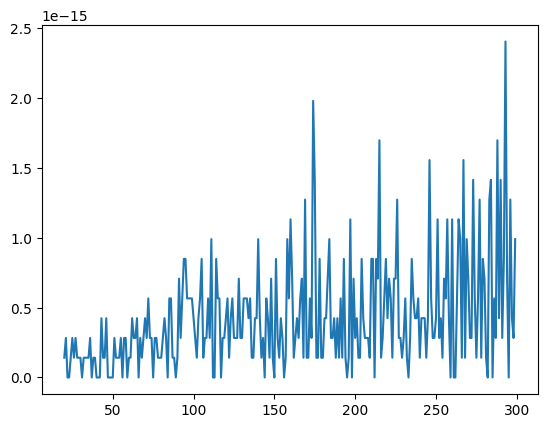

In [54]:
import math

def gauss_legendre(f, a, b, n):
    # Calculate the nodes and weights of the Gauss-Legendre quadrature
    nodes, weights = np.polynomial.legendre.leggauss(n)
    # print(weights)
    # print(nodes)
    
    # Map the nodes and weights from the interval [-1, 1] to [a, b]
    mapped_nodes = (b - a) / 2 * nodes + (b + a) / 2
    mapped_weights = (b - a) / 2 * weights
    # print(mapped_nodes)
    print(mapped_weights)
    
    # Calculate the integral using the quadrature formula
    integral = sum(mapped_weights * f(mapped_nodes))
    
    return integral

# Define the integrand function
def f(x):
    return 1 / (x ** 2 + 1)

# Calculate the integral using Gauss-Legendre quadrature
integral = gauss_legendre(f, 0, 1, 100)

err = []
n_space = []
for n in range(20, 300):
    err.append(abs(gauss_legendre(f, 0, 1, n) - PI/4)/(PI/4))
    n_space.append(n)

plt.semilogy
plt.plot(n_space, err)
plt.show

# Print the result
print(integral)
